# Initialisation


In [3]:
%matplotlib inline
from PIL import Image
import numpy as np
from numpy import *
from sklearn import preprocessing as prep
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt
import sklearn.cross_validation as crval
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_mldata
from scipy.interpolate import interp1d
from sklearn.svm import LinearSVC
import pylab
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.mixture import GMM
from sklearn.neighbors import KernelDensity
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import svm
import csv
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import warnings
warnings.filterwarnings("ignore")



/Users/mara/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
def write_answers(predictions, description):
    fp=open(description+'.txt','w')
    fp.write('Point_ID,Output\n')
    i=1
    for a in predictions:
        fp.write(str(i)+','+str(a)+'\n')
        i+=1
    fp.close()


In [5]:
X=[]
with open('density_data.csv','r') as f:
    reader = csv.reader(f)
    for row1 in reader:
        X.append(row1)
#print size(X)

X=np.asarray(X)
X=X[:,1:15] # removing the first column since it contains indexes

print 'Data dimensions: ' 
print X.shape

X=X.astype(np.float)


X= np.ravel(X)
X= X.reshape(5000, 14)
#print(shape(X))

# splitting .. 
selX = X # (atm) we take all data --> no splitting 

# scaling
std_scal=prep.StandardScaler()
selX_scaled=std_scal.fit_transform(selX)
print('Original mean: ' +str(mean(selX))+' and std:'+ str(std(selX)))
print('After-cleaning mean: '+str(mean(selX_scaled))+' and std: '+str(std(selX_scaled)))


X=selX_scaled


Data dimensions: 
(5000, 14)
Original mean: 0.189320842874 and std:2.26790054052
After-cleaning mean: 4.3038588566e-17 and std: 1.0


# Understanding the data: dimensionality reduction

#1. PCA

[ 0.26573872  0.20880904  0.16641332]


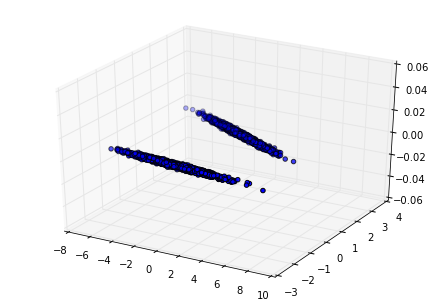

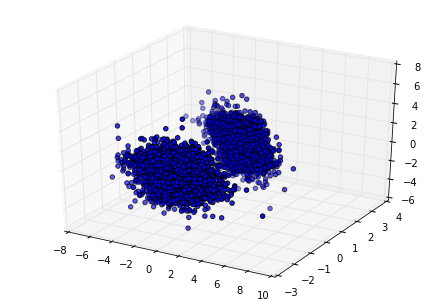

In [6]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)

pca.n_components = 3
X_reduced = pca.fit_transform(X)

Xpca=X_reduced[:,0]
Ypca=X_reduced[:,1]
Zpca=X_reduced[:,2]



fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(Xpca, Ypca)


fig = pylab.figure()
ax = Axes3D(fig)
x=linspace(0,10,5000)
XX=x
ax.scatter(Xpca, Ypca, Zpca)

print pca.explained_variance_ratio_


#2. FastICA: fast algorithm for Independent Component Analysis.

In [ ]:
from sklearn.decomposition import FastICA

rng = np.random.RandomState(42)
ica = FastICA(random_state=rng)
X_ica_ = ica.fit(X).transform(X)

print X_ica_.shape

pca.fit(X_ica_)

pca.n_components = 3
X_ica_reduced = pca.fit_transform(X_ica_)

Xica=X_ica_reduced[:,0]
Yica=X_ica_reduced[:,1]
Zica=X_ica_reduced[:,2]

fig = pylab.figure()
ax = Axes3D(fig)
x=linspace(0,10,5000)
XX=x
ax.scatter(Xica, Yica, Zica)


Not really a great result...

# ISOMAP dimensionality reduction

In [10]:
from sklearn import manifold

# learning the manifold

n_neighbors=20
X_reduced_iso = manifold.Isomap(n_neighbors, n_components=3).fit_transform(X).T

(3, 5000)


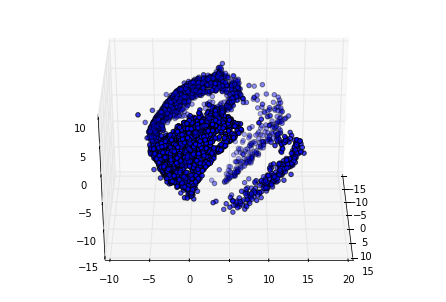

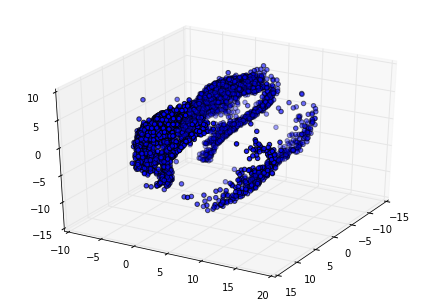

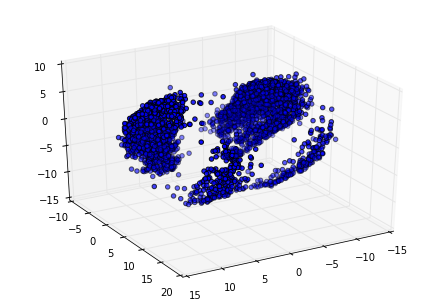

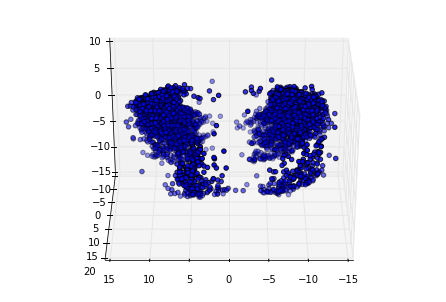

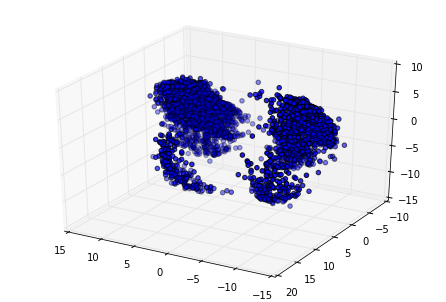

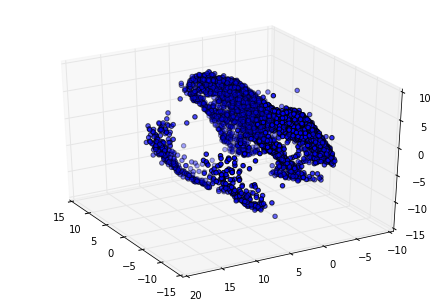

In [11]:
# 3D visualization
print X_reduced_iso.shape
trans_data=X_reduced_iso
X_iso=trans_data[0,:]
Y_iso=trans_data[1,:]
Z_iso=trans_data[2,:]

for angle in range(0, 180, 30):
    fig = pylab.figure()
    ax = Axes3D(fig)
    x=linspace(0,10,5000)

    ax = plt.gca()
    ax.scatter(X_iso, Y_iso, Z_iso, zorder=0.3)
    #ax.scatter(X_iso, Z_iso, zorder=0.3)
    
    ax.view_init(azim=angle)
    ax = plt.draw()
    plt.pause(.001)


So, it's two manifolds, slightly skewed. Maybe symmetrical?

# Correlation Analysis

In [ ]:
feat=7
for i in range(14):
    fig = pylab.figure()
    plt.scatter(X[:,feat], X[:,i])
    
    plt.title('Feat. '+ str(feat)+'against '+ str(i))
       

# Kernel PCA [stopped]

In [ ]:
# Requiring long time to compute....why?
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

In [ ]:
# 3D visualization
trans_data=X_kpca_
X_kpca=trans_data[0,:]
Y_kpca=trans_data[1,:]
Z_kpca=trans_data[2,:]

for angle in range(0, 180, 30):
    fig = pylab.figure()
    ax = Axes3D(fig)
    x=linspace(0,10,5000)

    ax = plt.gca()
    ax.scatter(X_kpca, Y_kpca, Z_kpca, zorder=0.3)
    #ax.scatter(X_iso, Z_iso, zorder=0.3)
    
    ax.view_init(azim=angle)
    ax = plt.draw()
    plt.pause(.001)

# K-means clustering

In [ ]:
init=np.random.randint(1)
centroids=[]
kmeans = KMeans(n_clusters=2, random_state=init).fit(X_reduced)
print kmeans.cluster_centers_
centroids=kmeans.cluster_centers_
print centroids[0]
fig = pylab.figure()
ax = Axes3D(fig)
x=linspace(0,10,5000)
XX=x

ax = plt.gca()

ax.scatter(Xpca, Ypca, Zpca, zorder=0.3)
ax.hold(True)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], color='y', s=10000, zorder=0.5)


# Parametric Methods. 
GMM, BGMM, Variational Autoencoders -->GP-LVM by Gharamani?

# BIC
Searching the no of components with Bayesian Information Criterion

In [21]:
old_mean=0;
old_bic=1000000
clusters=1
curr_bic=631209
# reduced or not reduced data? --> Think not PCA bc there's stuff which works better. Like ISOMAP?
# X_reduced=X_reduced_iso
X_reduced=X
while curr_bic<old_bic:
    old_bic=curr_bic
    
    clusterer=GMM(clusters, 'full')
    gmm_model=clusterer.fit(X_reduced)
    cluster_labels_l= gmm_model.score(X_reduced)

    means=gmm_model.means_

    print 'Bic for '+str(clusters)+ ' components: '+str(gmm_model.bic(X_reduced))
    curr_bic=gmm_model.bic(X_reduced)
    clusters+=1

#fig = pylab.figure()
#ax = Axes3D(fig)
#x=linspace(0,10,5000)
#XX=x

#ax = plt.gca()
#ax.scatter(Xpca, Ypca, Zpca, zorder=0.3)
#ax.hold(True)
#ax.scatter(means[:,0], means[:,1], means[:,2], color='green', s=5000, zorder=0.5)


Bic for 1 components: 90439.5187697
Bic for 2 components: 40931.2000931
Bic for 3 components: 40812.1541797
Bic for 4 components: 7394.08906919
Bic for 5 components: 4987.48283641
Bic for 6 components: -6926.64441586
Bic for 7 components: -8446.81051377
Bic for 8 components: -9144.29671029
Bic for 9 components: 475.910281383


Raw Data BIC components: 9


# Gaussian Mixture Models

In [7]:
components=9
X_reduced=X
print 'Number of components: '+str(components)
clusterer=GMM(components, 'full')
gmm_model=clusterer.fit(X_reduced)
cluster_labels_l= gmm_model.score(X_reduced)
print cluster_labels_l[0:3]
#predictions=gmm_model.predict(X_reduced)

print sum(cluster_labels_l)

Number of components: 9
[ 3.97155044  1.70421254  3.26918933]
4361.17795589


In [15]:
# OPT. For loop over the no of components to see how the likelihood changes
print X_reduced.shape
for components in range(20,50, 5):
    print 'Number of components: '+str(components)
    clusterer=GMM(components, 'full')
    gmm_model=clusterer.fit(X_reduced)
    cluster_labels_l= gmm_model.score(X_reduced)
    #print cluster_labels_l[0:3]
    #predictions=gmm_model.predict(X_reduced)

    print sum(cluster_labels_l)

(5000, 14)
Number of components: 20
21277.2794476
Number of components: 25
23666.8201977
Number of components: 30
23963.3324133
Number of components: 35
25456.0624771
Number of components: 40
25336.8721182
Number of components: 45
26194.8326389


# Bayesian Gaussian Mixture Models [to finetune]

In [30]:
from sklearn.mixture import BayesianGaussianMixture

#X=X_reduced_iso.transpose()
print X.shape
n_components=12
covariance_type='full' 
tol=0.001
reg_covar=1e-06
max_iter=15000 
init_params='kmeans' 
weight_concentration_prior_type='dirichlet_distribution'
random_state=random.randint(1,20)
warm_start=True 

#verbose=0, 
#verbose_interval=10
#n_init=1, 
#weight_concentration_prior=None, 
#mean_precision_prior=None, 
#mean_prior=None, 
#degrees_of_freedom_prior=None, 
#covariance_prior=None, 

model=BayesianGaussianMixture(
        weight_concentration_prior_type=weight_concentration_prior_type, verbose=0,
        n_components=n_components, covariance_type=covariance_type, reg_covar=reg_covar, init_params='kmeans',
        max_iter=1500, mean_precision_prior=.4,
        random_state=random_state, warm_start=warm_start)

fitted_model=model.fit(X)

cluster_labels_bgmm=model.score_samples(X)

#print X
predictions=model.predict(X)

print cluster_labels_bgmm

(5000, 14)
[-1.32685821 -3.39613665 -1.1469673  ..., -5.36275438  0.92944376
  0.64557094]


In [31]:
model.lower_bound_

51549.242352743837

In [32]:
sum(cluster_labels_bgmm)

-8790.7150780704687

In [33]:
write_answers(cluster_labels_bgmm, 'bayesiangmm_3components.txt')

# Non parametric Methods
Trying kernel density estimation and random trees 


# Kernel Density Estimation

In [92]:
values=X_reduced
kde = stats.gaussian_kde(values)
density = kde(values)


In [93]:
print density
#fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
#x, y, z = values
#ax.scatter(x, y, z, c=density)
#plt.show()

[ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]


In [ ]:
import statsmodels.api as sm


var_type_desc='cccccccccuccuu'
dens_u = sm.nonparametric.KDEMultivariate(data=X,var_type=var_type_desc, bw='cv_ls')
dens_u.bw


In [19]:
kde_predictions=dens_u.pdf(X)

In [20]:
print kde_predictions

[  1.36146014e-06   2.64292459e-07   1.29997916e-06 ...,   4.77238832e-07
   8.79346537e-07   1.11643863e-06]


In [ ]:
write_answers(kde_predictions, 'kde_predictions_4th_attempt_scaled_data')

# Random Stuff

In [ ]:
from sklearn.mixture import VBGMM

clusters=1
random_state=0
clusterer= VBGMM(
        n_components=2 * clusters,init_params='random',      
        random_state=random_state)
clusterer.fit(selX_scaled)
cluster_labels= clusterer.score(selX_scaled)
print cluster_labels

In [ ]:
from functools import partial
x2=Xpca

fig1 = plt.figure(figsize=(12, 10))
ax = fig1.add_subplot(111)
actual=cluster_labels
new=cluster_labels_l
ax.plot(actual, 'r--', label="Actual PDF")
ax.plot(new, 'b--', label="new PDF")

plot(np.absolute(x), 'g-', label="abs")

ax.legend(loc=2)
ax.set_xlabel('x')
ax.set_ylabel('Density Estimate')
#     plt.savefig(cwd+"/Plots/KDE_"+name+".png")


In [ ]:
Y=cluster_assgn=clusterer.predict(X_reduced)
print Y
print X_reduced.size
plt.scatter(XX,Y)

#for i in range (0,5000):
#    if (kpred[i])==0:
#        Xpca_one.append(Xpca[i])
#        Xpca_one_ii.append(i)
#        Ypca_one.append(Ypca[i])
#        #Ypca_one_ii.append(i)
#        plt.scatter(Xpca[i], Ypca[i])
#    else:
#        Xpca_two.append(Xpca[i])
#        Xpca_two_ii.append(i)
#        Ypca_two.append(Ypca[i])
#        #Ypca_two_ii.append(i)
#        plt.scatter(XX[i],kpred[i])

In [ ]:
lr = linear_model.LinearRegression()
n=len(Xpca_one)

#print n
lr.fit((np.asarray(Xpca_one)).reshape(1,n), (np.asarray(Ypca_one)).reshape(1,n))  # x needs to be 2d for LinearRegression
plt.scatter(Xpca_one, lr.predict(Xpca_one).reshape(n,1))

ll=lr.predict(Xpca_one)
print shape(l1)
lr = linear_model.LinearRegression()
n=len(Xpca_two)

print n
lr.fit((np.asarray(Xpca_two)).reshape(1,n), (np.asarray(Ypca_two)).reshape(1,n))  # x needs to be 2d for LinearRegression
plt.scatter(Xpca_two, lr.predict(Xpca_two).reshape(n,1))
print shape(lr.predict(Xpca_two))
lll=lr.predict(Xpca_two)

In [ ]:
factor = FactorAnalysis(n_components=4, , random_state=101).fit(X)


In [ ]:
print ll[0,2462]
#print Xpca_two_ii
#print lr.predict(Xpca_two)
#print Xpca_one_ii
predictions=np.zeros(5000)

counter=0
for i in Xpca_one_ii:
    predictions[i]=ll[0,counter]
    counter+=1
    

count=0
for i in Xpca_two_ii:
    #print i
    predictions[i]=lll[0,count]
    count+=1

In [ ]:
print predictions

In [ ]:
predictions=cluster_labels_l
fp=open('answers.txt','w')
fp.write('Point_ID,Output\n')
i=1
for a in predictions:
    fp.write(str(i)+','+str(a)+'\n')
    i+=1
fp.close()
    

In [ ]:
clusters=8
clusterer=GMM(clusters, 'full')
clusterer.fit(selX_scaled)
cluster_labels= clusterer.score(selX_scaled)


In [ ]:
print cluster_labels

In [ ]:
fp=open('answers.txt','w')
fp.write('Point_ID,Output\n')
i=1
for a in cluster_labels:
    fp.write(str(i)+','+str(a)+'\n')
    i+=1
fp.close()

In [ ]:
plt.scatter(selX_scaled[:,1], cluster_labels)
